## Imports

In [1]:
import os
from dotenv import load_dotenv
import torch
from model import UNet
from helper import infer_and_show, reconstruct
from huggingface_hub import login, hf_hub_download

## Loading the trained model

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [3]:
model = UNet(in_channels = 1, n_classes = 313).to(device)

In [4]:
# add hugging-face token that has access to this model: https://huggingface.co/nikhil-405/Gray2Color
load_dotenv()
HF_TOKEN = os.getenv("HF_TOKEN")

In [5]:
login(HF_TOKEN)

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: read).
Your token has been saved to C:\Users\LENOVO\.cache\huggingface\token
Login successful


In [6]:
# load model state dict
ckpt_path = hf_hub_download(repo_id = "nikhil-405/Gray2Color", filename = "Gray2Color.pth", token = HF_TOKEN)
checkpoint = torch.load(ckpt_path, map_location = device)
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

## Actual inference

In [7]:
# add url to an image to be colorized
image_url = "https://images.iphonephotographyschool.com/10819/1120/iPhone-Photos-Black-And-White-12.jpg"

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..2.55].


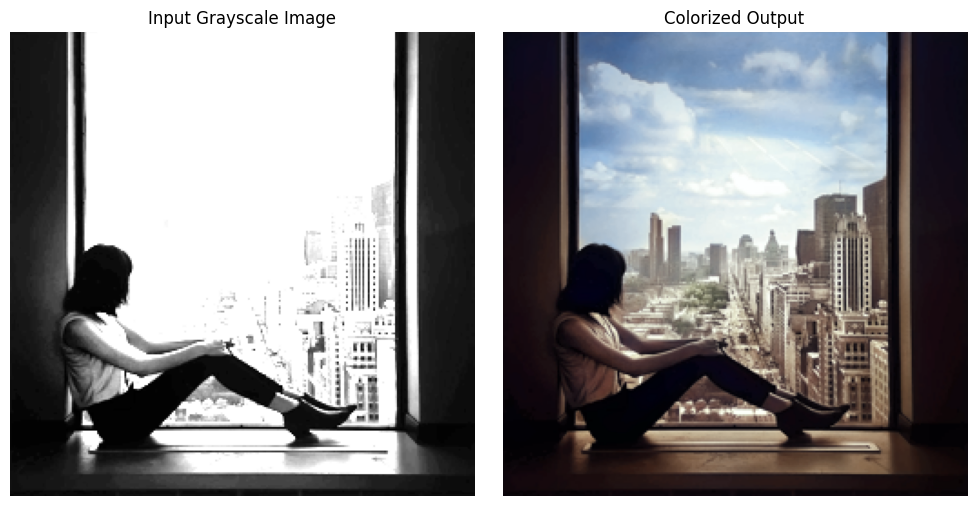

In [8]:
infer_and_show(image_url, model, reconstruct, device)

In [9]:
# torch.cuda.empty_cache()